# <center> Workshop 3: Extreme Precipitation</center>

# Introduction

To follow

Will include: 

- Threshold exceedance -- empirically determined. How does it change between now and in the future?
- Uncertainty - drivers of uncertainty. 

[Climate Lab Book](https://www.climate-lab-book.ac.uk/2013/sources-of-uncertainty/#:~:text=There%20are%20three%20main%20sources,%2Dmodel%20differences%20(blue).)

In [100]:
from netCDF4 import Dataset
import os, cdsapi
import zipfile
import xarray as xa
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
seconds_in_day=60**2*24
thresh=25 # mm/d
lat=52.76
lon=-1.23

# Read in obs and format
obs=pd.read_excel("Data/15min.xlsx",index_col=0,parse_dates=True)
obs=obs[~obs.index.duplicated()]["P"]
new_index=pd.date_range(start=obs.index[0],end=obs.index[-1],freq="15Min")
obs=obs.reindex(new_index)
daysum=obs.resample('D').apply(lambda x: np.sum(x.values))
jja=daysum.loc[daysum.index.month.isin([6,7,8])]

# What is the observed probability of p>thresh
p=np.sum(jja.values[:]>thresh)/np.sum(~np.isnan(jja.values[:]))
print("Prob of exceeding threshold = %.3f%%"%(p*100))

#annmax=daysum.resample("Y").max()
#print(daysum.max())

# Change this to a folder on your computer. It is where the zip files will be stored, and
# where their contents will be unpacked to. 
folder_store="/home/lunet/gytm3/Teaching/GYP050/Dev/CMIP6Data/Data/" # <= CHANGE ME

Prob of exceeding threshold = 0.756%


In [101]:
#plt.hist(daysum[daysum>0],bins=20)
#z=annmax["P"].loc[annmax["P"]>10].sort_values()
#daysum=obs["P"].resample("D").sum()
#daysum=daysum.reindex(pd.date_range(start=daysum.index[0],end=daysum.index[-1],freq="1D"))
#cx=1/np.arange(1,len(z)+1)
#fig,ax=plt.subplots(1,1)
#ax.scatter(z,cx)
#ax.set_yscale("log")
#ax.set_xscale("log")

Before trying to run the following code cell, make sure you have followed the instructions [here](https://docs.google.com/document/d/1cQlCfzge2XK7WToj3XPoafQVvVk6C5DLOhuoY8_UTNU/edit#)

In [102]:
c = cdsapi.Client()
c.retrieve( # Start downloading historical
    'projections-cmip6',
    {
        'temporal_resolution': 'daily',
        'experiment': 'historical',
        'level': 'single_levels',
        'variable': 'precipitation',
        'model': 'access_cm2', # <= CHANGE ME TO GET A DIFFERENT MODEL 
        'date': '1995-01-01/2014-12-31',
        'area': [
            60, -5, 50,
            5,
        ],
        'format': 'zip',
    },
    folder_store+'hist.zip',
    
) # End downloading historical

c.retrieve( # Start downloading future
    
    'projections-cmip6',
    {
        'temporal_resolution': 'daily',
        'experiment': 'ssp5_8_5',
        'level': 'single_levels',
        'variable': 'precipitation',
        'model': 'access_cm2', # <= CHANGE ME (TO MATCH MODEL ABOVE)
        'date': '2015-01-01/2100-12-31',
        'area': [
            60, -5, 50,
            5,
        ],
        'format': 'zip',
    },
    folder_store+'future.zip'
)# End downloading Future

2021-10-08 17:05:29,775 INFO Welcome to the CDS
2021-10-08 17:05:29,775 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip6
2021-10-08 17:05:29,795 INFO Request is queued
2021-10-08 17:05:30,811 INFO Request is running
2021-10-08 17:07:23,382 INFO Request is completed
2021-10-08 17:07:23,382 INFO Downloading https://download-0009.copernicus-climate.eu/cache-compute-0009/cache/data1/adaptor.esgf_wps.retrieve-1633709209.0535746-27320-9-303497e5-4467-4104-aa13-00771bcd50f8.zip to /home/lunet/gytm3/Teaching/GYP050/Dev/CMIP6Data/Data/hist.zip (1.5M)
2021-10-08 17:07:23,558 INFO Download rate 8.7M/s
2021-10-08 17:07:23,583 INFO Welcome to the CDS
2021-10-08 17:07:23,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip6
2021-10-08 17:07:23,603 INFO Request is queued
2021-10-08 17:07:24,619 INFO Request is running
2021-10-08 17:09:17,191 INFO Request is completed
2021-10-08 17:09:17,192 INFO Downloading https:/

Result(content_length=6248946,content_type=application/zip,location=https://download-0010.copernicus-climate.eu/cache-compute-0010/cache/data3/adaptor.esgf_wps.retrieve-1633709355.7367127-29979-5-047425a5-fd3d-4eb5-a7b1-f30b851d735a.zip)

In [103]:
# This code loops over the files placed in [ ] and then unzips each to the same directory
for f in [folder_store+"hist.zip",folder_store+"future.zip"]:
    with zipfile.ZipFile(f, 'r') as zip_ref:
        zip_ref.extractall(folder_store)
files=[folder_store + ii for ii in os.listdir(folder_store) if ".nc" in ii] # selects only files with a 
# ".nc" extension (these are the files we want!)

<AxesSubplot:xlabel='time'>

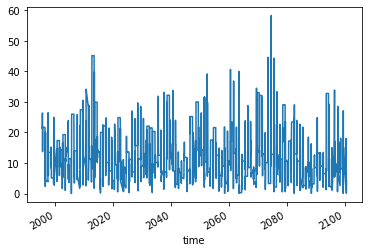

In [168]:
# xarray is used here to read in both the files as one dataset
din=xa.open_mfdataset(files)
# Now we extract the data for the grid point closes to Zhengzhou (34.7466° N, 113.6253° E)
nearest=din.sel(lat=lat,lon=lon,method="nearest")
mod=nearest["pr"].to_dataframe()*seconds_in_day
#mod.index=nearest.time_bnd.values[:]
mod_jja=mod["pr"].loc[mod.index.month.isin([6,7,8])]

# Plot here a running mean of annual precip -- to check everything looks ok. 
mod_jja.rolling(20).max().plot()


# Select past (first 20 years)



# Select future (end of century)



# Compute ratio



# Scale obs by this ratio




# Compute exceedance frequency 


In [164]:
mod

,lat,lon,pr
time,,,
1995-01-01 12:00:00,53.125,-0.9375,2.557160e-05
1995-01-02 12:00:00,53.125,-0.9375,5.640383e-05
1995-01-03 12:00:00,53.125,-0.9375,5.557270e-05
1995-01-04 12:00:00,53.125,-0.9375,8.267559e-07
1995-01-05 12:00:00,53.125,-0.9375,7.384710e-05
...,...,...,...
2100-12-26 12:00:00,53.125,-0.9375,5.111351e-06
2100-12-27 12:00:00,53.125,-0.9375,2.174391e-04
2100-12-28 12:00:00,53.125,-0.9375,8.416287e-05


In [ ]:
# And below, select the 'historical' period (1995-2014)
hist=data.sel(time=slice("1995-01-01 00:00","2015-01-01 00:00"))
# Repeat, future -- let's take last 20 years of the century
future=data.sel(time=slice("2080-01-01 00:00","2101-01-01 00:00"))

Something profound to go here. 

In [ ]:
# What is the change in the mean and in the extreme (99.9th percentile)?
pc_change_mean=np.mean(future.pr.values)/np.mean(hist.pr.values) # Change in mean
pc_change_xx=np.percentile(future.pr.values,99.9)/np.percentile(hist.pr.values,99.9) # Change in extreme
print("Mean precip in future is %.2f times that in the historical simulation"%pc_change_mean)
print("Extreme precip in future (99.99th %%-tile) is %.2f times that in the historical simulation"%pc_change_xx)